Linear models such as Logistic Regression or Support Vector Machines have been very successfull in machine learning and in NLP. In this module, we'll take a look at using linear models.

## Key Takeaway
Anyone can run a linear model in two lines of code. The "secret" to getting them to work is representing our text in a way that is convenient for a linear model (e.g. linearly seperable, or seperable in a space the model can project to ).

In NLP, the default representation is the [Bag of Words model](https://en.wikipedia.org/wiki/Bag-of-words_model). The bag of words model basically says "Our linear algorithms and random forests need each example to be a vector. So let's take a document/sentence/phrase and make it a vector by counting which words are in it "
This is easiest understood with code :

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
documents = [ # Fit it to our corpus of two documents
    "The quick brown fix jumped over the lazy dog",
    "The fat brown monkey jumped under the active cat"
]
C =CountVectorizer() # intiialize the vectorizer
C.fit(documents)
C.transform(documents).todense()


matrix([[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0],
        [1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1]])

In [17]:
C.transform(["Another document about a dog"]).todense() #Notice it ignores all the words we didn't "fit" to

matrix([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


## Choosing tokens
Since linear models basically look at the frequency of words, one of the most important decisions we need to make is **what is a word** in our world. In addition, the more "words" we have, the more features our model will have and thus the more data we'll need to train on. 

## Our problem
Like in problem set 1, we still want to understand if a given number is even or odd, based on the word representation. In problem set 1, we did this with Regular Expressions. Now we'll do it with "machine learning" 
### Our Big problem
Our data looks like 
```
vierzehnmillionfünfhundreteinundzwanzigtausendvierhundretfünfzehn
```
How can we get it into the bag of words model ? And how can we do it in a way that is meaningfull towrds the problem we want to solve ?

### Boilerplate for this project
This excercise assumes you are familiar with the idea of linear models and using sciKit learn. We're mostly going to work on repesenting the text to our models optimally. If you're not familiar with either SKLearn or linear models now is a good time to review 

In [56]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from utils.numtoWord import createNum2WordDict
def makePipeline(vectorizer,model=svm.SVC()):
    '''
    Gets a vectorizer and some model, returns a Pipeline object that runs them both
    '''
    
    return Pipeline([('vectorizer', vectorizer), ('model', model)])


def makeExamples(amount=1000,high=10**18):
    '''
        Returns  amount tuples of "text-number" label to work with. 
        label is 0 if number is even, 1 if it is odd
    '''
    data = createNum2WordDict(100,high=high)    
    examples = list(data.values())
    labels = list(map(lambda x:x %2,data.keys()))
    return examples,labels



## Using the boiler plate effectively 

### Building and running a  pipeline

In [61]:
#Using the boiler plate
C =CountVectorizer() # intiialize a  vectorizer. THIS IS WHERE YOU SHOULD BE DOING MOST OF YOUR WORK
P = makePipeline(C) # Feed the vectorizer into the pipeline factory
examplesTrain, labelsTrain = makeExamples(1000,10**3) #Create some training data
examplesTest, labelsTest = makeExamples(1000,10**3) # Create some test data
P.fit(examplesTrain,labelsTrain) # Fit the vectorizer and train the model.
predictions = P.predict(examplesTest) # Predict results



### Examining what your vectorizer is doing

In [62]:
# Show the vector representation of an example
P.named_steps['vectorizer'].transform([examplesTrain[2]]).todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [63]:
# Show the features/words/tokens your vectorizer knows
P.named_steps['vectorizer'].get_feature_names()[:10]


['achthundretacht',
 'achthundretachtzehn',
 'achthundretdreiundzwanzig',
 'achthundretfünfunddreiβig',
 'achthundretfünfundfünfzig',
 'achthundretneunundsechzig',
 'achthundretneunundvierzig',
 'achthundretsiebenundzwanzig',
 'achthundretundfünfzig',
 'achthundretundsiebzig']

# Excercise 1 - Warm up
Use the pipeline shown above to train and test a model. Use [SkLearn metrics](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) to evaluate it. 

1. Is it any  good ? 
2. Why is it bad ? Hint - Look at the vocabulary the vectorizer has 
3. Discuss - Is their anything we can do to the model to improve this ?


In [1]:
# Your code goes here

# Excercise 2 - Ngrams and char tokenizer
Look at the documentation for the [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) 
Focus on the paramters 
* ngram_range
* analyzer

Train and evaluate a new pipeline with analyzer set to *'char'*. Experiment with values of ngram_range. 
What do different values of ngram_range do to ? 
* The speed of training ?
* The accuracy of your model ? 
* How does adding more training data effect it ? 

**hint** You should be looking at plots like this one to understand the effect of ngrams and amount of training data
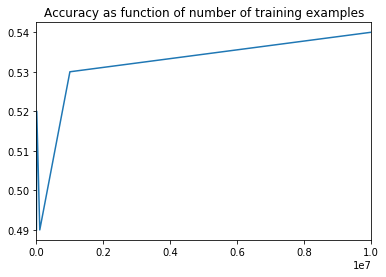




In [2]:
#Your code goes here

# Excercise 3 - Custom Tokenizer

* Examine the vocabulary the your vectorizer is learning. Is it adequate ? 
* Use the techniques we saw in Problem set 1 to write a custom tokenizer

Your tokenizer should bhelp reach a model of around 80% accuracy 
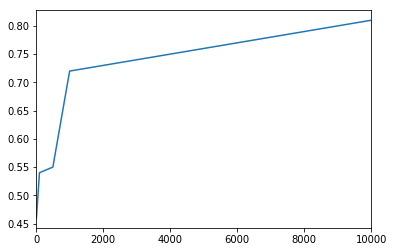

A custom tokenizer looks like this
```python
def tokenizer(doc):
    return list(doc)  # retruns the individual chars in the document
    
```

And you use it like this
```p
C =CountVectorizer(tokenizer=tokenizer,max_features=1000) # intiialize the vectorizer

In [205]:
def tokenizer(doc):
    '''
        YOUR ANSWER HERE
    '''
res ={}
for num in [10,100,500,1000,10000]:
    C =CountVectorizer(tokenizer=tokenizer,max_features=1000) # intiialize the vectorizer
    P = makePipeline(C) # Feed the vectorizer into the pipeline factory
    examplesTrain, labelsTrain = makeExamples(num,10**8) #Create some training data
    examplesTest, labelsTest = makeExamples(1000,10**8) # Create some test data
    P.fit(examplesTrain,labelsTrain) # Fit the vectorizer and train the model.
    predictions = P.predict(examplesTest) # Predict results
    res[num] =(accuracy_score(y_true=labelsTest,y_pred=predictions))

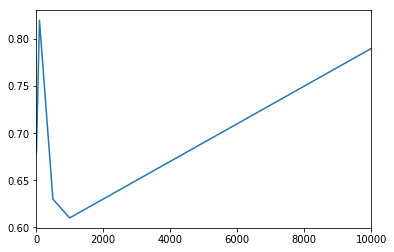

In [206]:
pd.Series(res).plot()

In [160]:
examplesTrain[:10], labels[:10]

(['achthundreteinundvierzigtausendzweihundretsechszehn',
  'fünftausendachthundretachtundachtzig',
  'zweihundretfünfunddreiβigtausendfünfhundretdreiundzwanzig',
  'neunhundretvierundsiebzigtausendfünfundachtzig',
  'neunhundretundvierzigtausendachthundretsieben',
  'vierhundretzweiundsechzigtausendeinundneunzig',
  'siebenhundretsechsundachtzigtausendsiebenhundretzwei',
  'zweihundretfünfundachtzigtausendzweihundretein',
  'achthundreteinundachtzigtausendneunhundretundvierzig',
  'vierhundretachttausendachthundretfünfundfünfzig'],
 [0, 0, 0, 0, 1, 1, 0, 1, 0, 1])